IUM Etap 1 Analiza danych

Piotr Grabowski, Marcin Lusawa

IUM Etap 1 Analiza danych

Piotr Grabowski, Marcin Lusawa

In [5]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [6]:
#load data
data_path = 'data2'
csv_files = ['calendar', 'listings', 'reviews', 'sessions', 'users']

dataframes = {}

for file_name in csv_files:
    file_path = os.path.join(data_path, f'{file_name}.csv', f'{file_name}.csv')
    try:
        dataframes[file_name] = pd.read_csv(file_path)
        print(f"File {file_name}.csv  shape: {dataframes[file_name].shape}")
    except FileNotFoundError:
        print(f"File {file_path} not found")

calendar_df = dataframes.get('calendar')
listings_df = dataframes.get('listings') 
reviews_df = dataframes.get('reviews')
sessions_df = dataframes.get('sessions')
users_df = dataframes.get('users')


C:\Users\piotr\AppData\Local\Temp\ipykernel_6992\1877919700.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file_name] = pd.read_csv(file_path)


File calendar.csv  shape: (12622208, 7)
File listings.csv  shape: (34542, 79)
File reviews.csv  shape: (1927665, 7)
File sessions.csv  shape: (26033234, 4)
File users.csv  shape: (1797219, 7)


### Analiza calendar.csv

In [7]:
calendar_df.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2737,2025-03-05,t,$55.00,NaN,31.0,1125.0
1,2737,2025-03-06,t,$55.00,NaN,31.0,1125.0
2,2737,2025-03-07,t,$55.00,NaN,31.0,1125.0
3,2737,2025-03-08,t,$55.00,NaN,31.0,1125.0
4,2737,2025-03-09,t,$55.00,NaN,31.0,1125.0


In [8]:
calendar_df.isna().mean()
print(f"Łączna liczba pustych pozycji per kolumna:\n{calendar_df.isnull().sum()}\n")
print(f"Łączna liczba wierszy z jakąkolwiek pustą pozycją: {calendar_df.isnull().any(axis=1).sum()}")
print(f"Procent wierszy z pustymi wartościami: {(calendar_df.isnull().any(axis=1).sum() / len(calendar_df)) * 100:.2f}%")
print(calendar_df.describe(include='all'))

Łączna liczba pustych pozycji per kolumna:
listing_id               0
date                     0
available                0
price                    0
adjusted_price    12614887
minimum_nights       15885
maximum_nights       15885
dtype: int64

Łączna liczba wierszy z jakąkolwiek pustą pozycją: 12614908
Procent wierszy z pustymi wartościami: 99.94%
          listing_id        date available     price adjusted_price  \
count   1.262221e+07    12622208  12622208  12622208           7321   
unique           NaN         375         2      1143            482   
top              NaN  2026-02-19         t   $100.00      $1,500.00   
freq             NaN       34538   7162044    620528            720   
mean    6.514890e+17         NaN       NaN       NaN            NaN   
std     5.458636e+17         NaN       NaN       NaN            NaN   
min     2.737000e+03         NaN       NaN       NaN            NaN   
25%     3.347990e+07         NaN       NaN       NaN            NaN   
50%     8

### Wnioski

Te dane nie są użyteczne do projektu, ponieważ nie zawierają żadnych informacji o jakości pobytu, treści recenzji lub innych informacji przydatnych do modelu. Zbiór zawiera jedynie dokładniejsze informacje o ofercie (dostępność, liczba nocy etc.)

Dodatkowo zbiór jest bardzo niekompletny (100% wierszy zawiera najmniej jedną wartość brakującą). Zbiór jest zatem nieprzydatny do realizacji zadania.


### Analiza listings.csv

In [9]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.nocarz.pl/rooms/2737,20250305023410,2025-03-05,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.04
1,3079,https://www.nocarz.pl/rooms/3079,20250305023410,2025-03-08,city scrape,Cozy apartment (2-4)with Colisseum view,With the view of the Colisseum from the front ...,Monti neighborhood is one of the best areas in...,https://a0.muscache.com/pictures/miso/Hosting-...,3504,...,4.86,4.81,4.43,NaN,f,6,6,0,0,0.12
2,11834,https://www.nocarz.pl/rooms/11834,20250305023410,2025-03-15,city scrape,"Charming Boschetto Studio, Rome",Fantastic appartment in the Monti district. Th...,"""Monti"" with its narrow cobblestone alleys, cr...",https://a0.muscache.com/pictures/miso/Hosting-...,44552,...,4.96,4.99,4.81,IT058091C29VJSIZQZ,f,1,1,0,0,1.59
3,12398,https://www.nocarz.pl/rooms/12398,20250305023410,2025-03-06,city scrape,Casa Donatello - Home far from Home,Casa Donatello is a newly renovated two-bedroo...,You are at 15 minutes walking distance from hi...,https://a0.muscache.com/pictures/miso/Hosting-...,11756,...,5.00,4.87,4.82,it058091c2kv6epw8f,f,1,1,0,0,0.45
4,1211500232171693714,https://www.nocarz.pl/rooms/1211500232171693714,20250305023410,2025-03-05,city scrape,La Quercia Nera - Trastevere - Centro di Roma,Discover the charm of Rome by staying in our n...,You will appreciate the proximity to Trastever...,https://a0.muscache.com/pictures/hosting/Hosti...,590573096,...,5.00,4.80,5.00,IT058091C2P495DNNK,f,5,1,4,0,3.13


In [10]:
print("\n Ile brakuje w kolumnach:")
listings_df.isna().mean().sort_values(ascending=False)



 Ile brakuje w kolumnach:


neighbourhood_group_cleansed                    1.000000
calendar_updated                                1.000000
host_neighbourhood                              0.649557
host_about                                      0.537722
neighbourhood                                   0.494644
                                                  ...   
instant_bookable                                0.000000
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
Length: 79, dtype: float64

### Wnioski
Zbiór nie zawiera informacji, które pozwalają zrozumieć co goście chwalą lub krytykują. Zawiera jedynie informacje przydatne do opisu lokalu, ale nie do modelu (adres,typ, opis ogólny etc.). Zbiór bardzo niekompletny - dużo kolumn ma znaczące braki danych w danych (>80%).

Zbiór może być jedynie przydatny do mapowanie listing_id na nazwę lokalu i dodanie dodatkowych informacji o lokalu np. w generowanym raporcie, ale nie jest przydatny do samego modelu.

### Analiza reviews.csv

In [11]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,numerical_review
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking...",5
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ...",5
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt...",5
3,2737,30477570,2015-04-22,31215535,Sevil,I had a wonderful time staying with Elif and h...,5
4,2737,31659336,2015-05-08,1959813,Suzy,"Elif was a brilliant host, with an exceptional...",5


In [12]:
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927665 entries, 0 to 1927664
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   listing_id        int64 
 1   id                int64 
 2   date              object
 3   reviewer_id       int64 
 4   reviewer_name     object
 5   comments          object
 6   numerical_review  int64 
dtypes: int64(4), object(3)
memory usage: 102.9+ MB


In [13]:
print("\n Ile brakuje w kolumnach:")
missing_perc = reviews_df.isna().mean().sort_values(ascending=False)
print(missing_perc)



 Ile brakuje w kolumnach:
comments            0.000061
reviewer_name       0.000001
listing_id          0.000000
date                0.000000
id                  0.000000
reviewer_id         0.000000
numerical_review    0.000000
dtype: float64


In [14]:

# ile recenzji zawiera listing_id i comment
valid_reviews = reviews_df.dropna(subset=['listing_id', 'comments'])
print("Liczba recenzji z niepustym listing_id i komentarzem:", len(valid_reviews))
print("Procent tych recenzji:", str(round(len(valid_reviews) / len(reviews_df) * 100, 2)) + "%")


# ile listing ma chociaz 1 recenzje
num_listings = reviews_df['listing_id'].nunique()
num_valid_listings = valid_reviews['listing_id'].nunique()

print("Liczba unikalnych listingów:", num_listings)
print("Liczba listingów z co najmniej 1 poprawną recenzją:", num_valid_listings)


Liczba recenzji z niepustym listing_id i komentarzem: 1927547
Procent tych recenzji: 99.99%
Liczba unikalnych listingów: 28820
Liczba listingów z co najmniej 1 poprawną recenzją: 28819


C:\Users\piotr\AppData\Local\Temp\ipykernel_6992\1037887593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_reviews['len'] = valid_reviews['comments'].astype(str).apply(len)


Średnia długość komentarza: 275.2447239937599
Mediana długości komentarza: 209.0
Procent komentarzy krótszych niż 20 znaków: 3.41 %


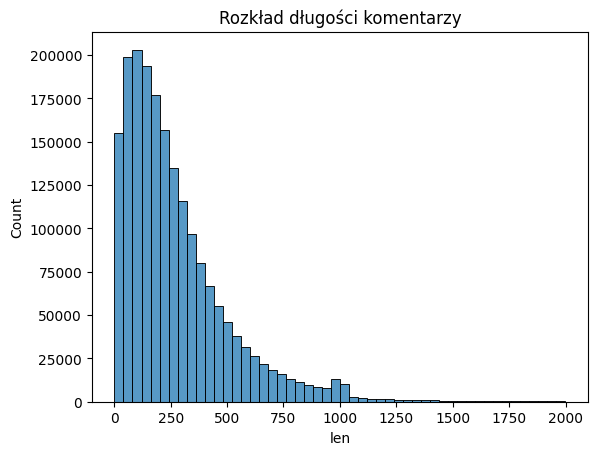

In [15]:
# dlugosc komentarzy
valid_reviews['len'] = valid_reviews['comments'].astype(str).apply(len)

print("Średnia długość komentarza:", valid_reviews['len'].mean())
print("Mediana długości komentarza:", valid_reviews['len'].median())
print("Procent komentarzy krótszych niż 20 znaków:",
      round((valid_reviews['len'] < 20).mean() * 100, 2), "%")

sns.histplot(valid_reviews[valid_reviews['len'] < 2000]['len'], bins=50)
plt.title("Rozkład długości komentarzy")
plt.show()


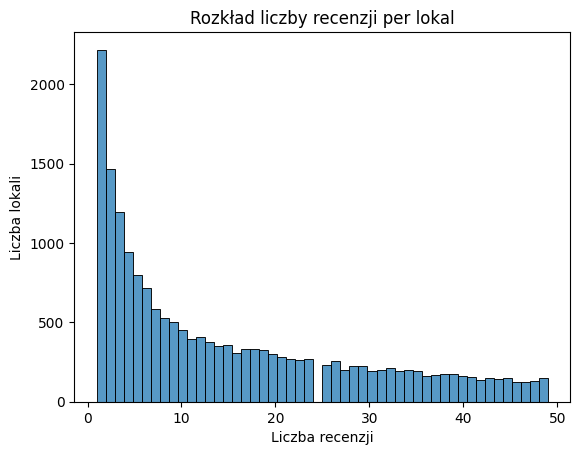

Średnia recenzji na lokal: 66.88459002741247
Mediana recenzji na lokal: 26.0
Liczba lokali z conajmniej 5 recenzjami: 22195


In [16]:

# recenzje per lokal
reviews_per_listing = valid_reviews.groupby('listing_id').size()

sns.histplot(reviews_per_listing[reviews_per_listing < 50], bins=50)
plt.title("Rozkład liczby recenzji per lokal")
plt.xlabel("Liczba recenzji")
plt.ylabel("Liczba lokali")
plt.show()

print("Średnia recenzji na lokal:", reviews_per_listing.mean())
print("Mediana recenzji na lokal:", reviews_per_listing.median())

print("Liczba lokali z conajmniej 5 recenzjami:", (reviews_per_listing > 5).sum())


comments
en    182
it     31
es     29
fr     27
de     10
pt      4
ko      4
nl      3
ca      2
pl      2
ru      1
ro      1
id      1
ja      1
sw      1
sv      1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='comments'>

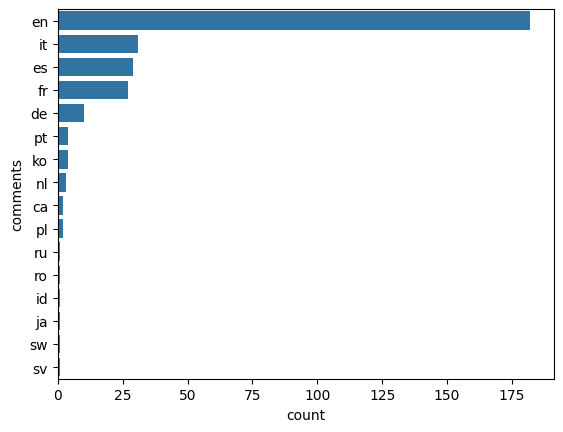

In [18]:
#  Jakie wystepuja jezyki w recenzji - na próbce

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

sample = valid_reviews['comments'].sample(300, random_state=0)
langs = sample.apply(lambda x: detect(str(x)))
print(langs.value_counts())
sns.countplot(y=langs, order=langs.value_counts().index)

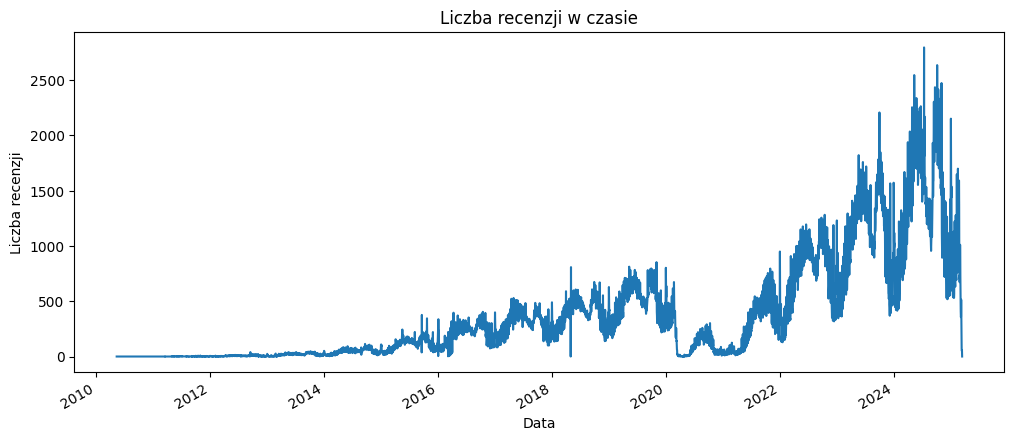

In [19]:
# liczba recenzji w czasie
valid_date_reviews = valid_reviews.dropna(subset=['date'])
valid_date_reviews['date'] = pd.to_datetime(valid_date_reviews['date'], errors='coerce')
valid_date_reviews = valid_date_reviews.dropna(subset=['date'])

valid_date_reviews['date'].value_counts().sort_index().plot(figsize=(12,5))
plt.title("Liczba recenzji w czasie")
plt.xlabel("Data")
plt.ylabel("Liczba recenzji")
plt.show()

### Wnioski

Zbiór reviews_df zawiera recenzje użytkowników i jest najbardziej przydatny do realizacji zadania, gdyż niesie informacje o recenzjach użytkowników w postaci komentarzy. Kolumna comment zawiera opinie, listing_id umożliwia przypisanie ja do lokalu, a kolumna date pozwala również na analizę w czasie.

Jedynie 9% danych zawiera zarówno recenzje jak i listing_id - czyli dane konieczne w modelu, ale jest to ponad 86 000 danych, więc ilość powinna być wystarczająca do stworzenia modelu.

Większość recenzji jest wystarczająco długość by zawierać sensowne opinie (tylko 3% ma <20 znaków)

Wiele lokali ma niewiele recenzji (mediana to 3), a jedynie ~5000 lokali ma >=5 recenzji (uważamy, że to minimalna liczba by stworzyć faktyczny i sensowny ranking aspektów). Dla pozostałych lokali ranking będzie bardziej losowy przez małą ilość danych. (potrzeba więcej danych z kompletnymi kolumnami zarówno comment i listing_id)

Recenzje pisane są w różnych językach, ale w większości (~60% na próbce) są w języku angielskim. Wielojęzyczność nie uniemożliwia jednak zrealizowanie zadania. 

Dane z recenzji zebrane są na przestrzeni 10 lat i posiadają okresy wysokiej i niskiej aktywności - czyli sezony w ciągu roku. Z powodu ich rozłożenia w czasie można również analizować trendy w recenzjach.

Reasumując - prośba odnośnie danych do Zarządu Nocarz:

Przydałoby się więcej danych zawierających recenzje dla lokali (ulepszy to jakość rankingu aspektów i zmniejszy jego losowość). 

Przydałyby się również, aby otrzymać dane, gdzie recenzje są w jednym języku (ułatwi to zadanie, ale nie jest niezbędne do realizacji)


### Analiza sessions.csv

In [20]:
sessions_df.head()


,action,user_id,timestamp,listing_id
0,browse_listings,24333039,2024-12-08T09:32:28.655182,NaN
1,view_listing,24333039,2024-12-08T10:17:49.655182,8.989736e+17
2,view_listing,24333039,2024-12-08T10:56:43.655182,1.185622e+18
3,view_listing,24333039,2024-12-08T11:12:28.655182,5.033300e+04
4,view_listing,24333039,2024-12-08T11:34:55.655182,6.561661e+17


In [21]:
print("\n Ile brakuje w kolumnach:")
sessions_df.isna().mean().sort_values(ascending=False)



 Ile brakuje w kolumnach:


listing_id    0.074046
action        0.000000
user_id       0.000000
timestamp     0.000000
dtype: float64

### Wnioski
Dane o sesjach użytkownika (zawierają aktywności użytkowników na stronie) nie niosą informacji o recenzjach, zatem są zbędne do modelu. Zbiór również w znacznej cześci niekompletny - 70% wartości w każdej kolumnie zawiera braki.


### Analiza users.csv

In [22]:
users_df.head()


,id,name,surname,city,street,street_number,postal_code
0,150971430,Monika,Ochab,Tczew,Owocowa,62,55-413
1,214977242,Adam,Wypchło,Tarnobrzeg,Wojska Polskiego,445,69-050
2,570767338,Borys,Sawko,Świdnica,Modrzewiowa,736,42-547
3,545975408,Kornelia,Cięciwa,Mielec,Wodna,81/49,48-482
4,287258371,Daniel,Apostel,Zambrów,Zaciszna,72,90-082


In [23]:
print("\n Ile brakuje w kolumnach:")
users_df.isna().mean().sort_values(ascending=False)



 Ile brakuje w kolumnach:


id               0.0
name             0.0
surname          0.0
city             0.0
street           0.0
street_number    0.0
postal_code      0.0
dtype: float64

### Wnioski
Zbiór nie niesie informacji odnośnie recenzji, a jedynie prywatne dane osobowe, które nie są potrzebne do oceny recenzji oraz nie powinny być użyte ze względu na prywatność użytkowników. Dane te również nie zostają wykorzystane w modelu.